In [101]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import time

In [139]:
df = pd.read_csv(r'/kaggle/input/housing-dataset/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [103]:
df.shape

(20640, 10)

In [104]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [105]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [106]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["ocean_proximity"] = label_encoder.fit_transform(df["ocean_proximity"])
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


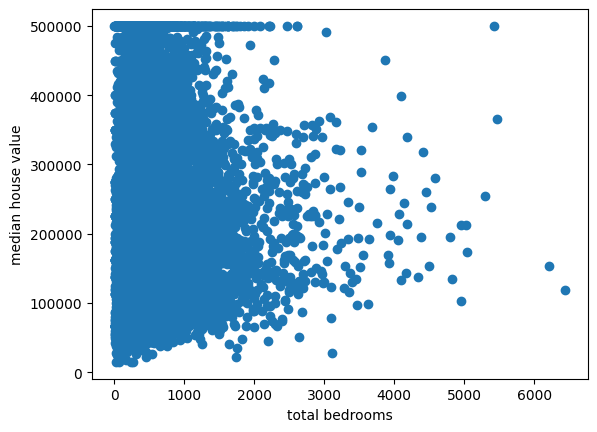

In [107]:
plt.scatter(df['total_bedrooms'],df['median_house_value'])
plt.xlabel("total bedrooms")
plt.ylabel("median house value")
plt.show()

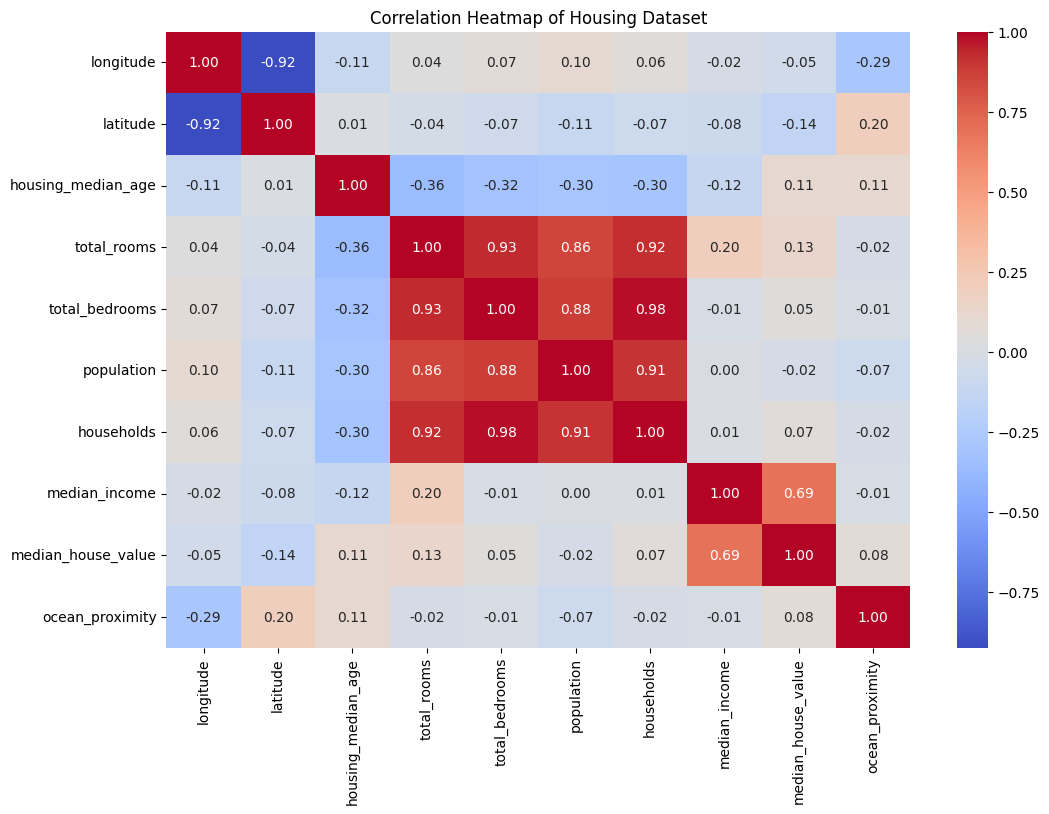

Correlations with median_house_value:
 median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
ocean_proximity       0.081750
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


In [108]:
import seaborn as sns
corr_matrix = df.corr()
corr_with_median_value = corr_matrix["median_house_value"].sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Housing Dataset')
plt.show()

print("Correlations with median_house_value:\n", corr_with_median_value)

In [140]:
df = df.dropna(axis=0)

In [110]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [141]:
x=df['median_income']
y = df["median_house_value"]
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

# part 1 : using purely python for multivariable linear regression

In [112]:
def dot_product(v1, v2):
    result = 0
    for i in range(len(v1)):
        result += v1[i] * v2[i]
    return result
    
def scalar_multiply(scalar, vector):
    return [scalar * x for x in vector]
    
def vector_subtract(v1, v2):
    return [v1[i] - v2[i] for i in range(len(v1))]
    
def vector_add(v1, v2):
    return [v1[i] + v2[i] for i in range(len(v1))]

In [113]:

class multivar_lin_reg:
    def _init_(self):
        self.bias = None
        self.weight = None

    def fit(self,x,y):# y is the dependent variable. It depends on x1,x2 and x3 which are independent variable.
        x_mean = x.mean()
        y_mean = y.mean()
    
        num=0
        den=0
        for i in range(len(x)):
            num += ((x.iloc[i]- x_mean)*(y.iloc[i] - y_mean))
            den += (x.iloc[i] - x_mean)**2
        self.weight = num / den 
        self.bias = 0
    
        
        lr = 0.001 #learning rate
        iterations = 2000
        
        
        start_time = time.time()
        mse_list = []
        
        for iteration in range(iterations):
            prediction = self.bias + self.weight*x
            errors = prediction - y
            
            mse = (errors**2).mean()
            mse_list.append(mse)
            m = len(y)
            gradient = (2/m)*dot_product(list(x.T),list(errors))
            gradient_b = (2/m) * sum(errors)
            self.weight -= lr * gradient
            self.bias -= lr*gradient_b
        end_time = time.time()
        print(f'converging time:{end_time - start_time}')
        print(self.weight)
        print(self.bias)
        plt.figure(figsize=(11,7))
        plt.plot(range(iterations),mse_list)
        plt.title("cost function")
        plt.xlabel("iterations")
        plt.ylabel("mean square error")
        plt.show()
        
    

    def predict(self, x):
        x_mean = x.mean
        predictions = []
        for i in range(x.shape[0]):
            prediction = self.bias + self.weight*x.iloc[i]
            predictions.append(prediction)
        return predictions  


converging time:6.841675758361816
46161.51183638571
24381.27303158448


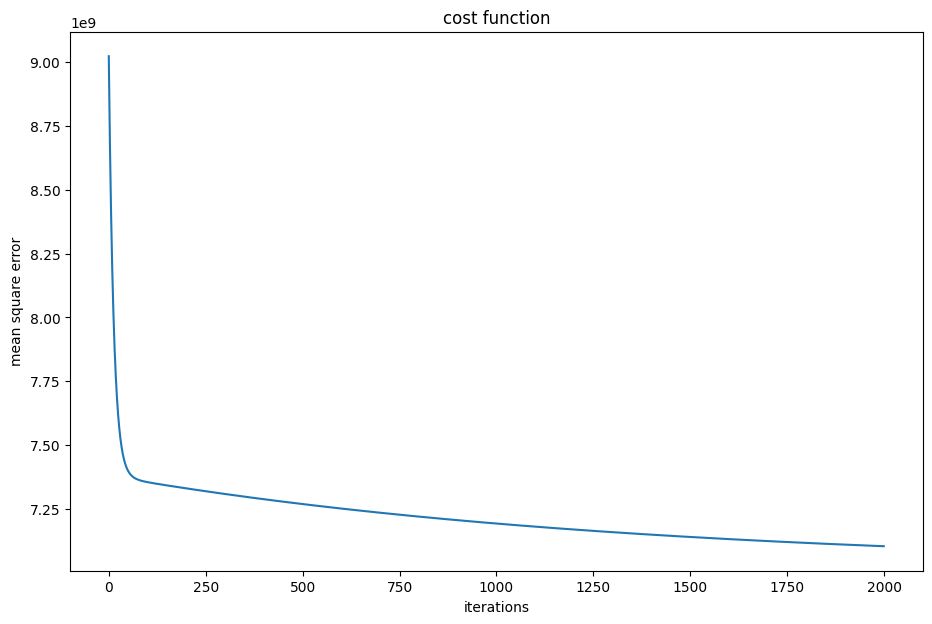

In [114]:

model= multivar_lin_reg()
model.fit(x_train,y_train)


The loss function measures how far predictions are from actual values:

𝑀𝑆𝐸=  (1/𝑚)∑(predicted value −actual value)^2


where 𝑚 is the number of training samples.

Gradient of Weight :

∂𝑀𝑆𝐸/∂𝑤  =  −2/𝑚∑𝑥(predicted value−actual value)

Gradient of Bias :

∂𝑀𝑆𝐸/∂𝑏  =  −2/𝑚∑(predicted value−actual value)

In [115]:
y_pred = model.predict(x_test)

In [116]:
errors = y_pred - y_test
errors

9275     -44015.200140
18656    -76872.964265
3176      75120.554605
20582    105128.537606
17018    -44887.535499
             ...      
8269    -101962.689225
3984      56184.262261
14422   -106262.913350
20251    -38623.624521
7758      29066.609207
Name: median_house_value, Length: 4087, dtype: float64

In [117]:
mae_1 = abs(errors).mean()
mae_1

62017.990152699414

In [118]:
t=0
for i in errors:
    t += i**2
rmse_1 = (t/len(errors))**0.5
rmse_1

83962.95928998312

In [119]:
mean_y = sum(y_test) / len(y_test)
den=0
for i in range(len(y_test)):
    den += (y_test.iloc[i]-mean_y)**2
num=0
for i in range(len(y_test)):
    num += (y_test.iloc[i]-y_pred[i])**2

r2_1 = 1-(num / den) 
r2_1

0.4689208805396682

# Part 2: Optimized Numpy Implementation

In [120]:
class numpy_multivar_lin_reg:
    def __init__(self):
        self.bias = None
        self.weight = None

    def fit(self, x, y):
        x = np.array(x)  # Convert to NumPy array
        y = np.array(y)

        x_mean = np.mean(x)
        y_mean = np.mean(y)
    
        # Compute initial weight using least squares
        num = np.sum((x - x_mean) * (y - y_mean))
        den = np.sum((x - x_mean)**2)
        self.weight = num / den
        self.bias = 0  # Initializing bias
        
        # Gradient Descent parameters
        lr = 0.001  # Learning rate
        iterations = 2000
        
        start_time = time.time()
        mse_list = []

        for iteration in range(iterations):
            prediction = self.bias + self.weight * x
            errors = prediction - y
            
            # Compute Mean Squared Error
            mse = np.mean(errors**2)
            mse_list.append(mse)
            
            m = len(y)
            gradient_w = (2/m) * np.dot(x.T, errors)  # Weight gradient
            gradient_b = (2/m) * np.sum(errors)  # Bias gradient
            
            # Update parameters
            self.weight -= lr * gradient_w
            self.bias -= lr * gradient_b
        
        end_time = time.time()
        print(f'Converging time: {end_time - start_time:.6f} seconds')
        print(f'Final weight: {self.weight:.6f}')
        print(f'Final bias: {self.bias:.6f}')
        
        # Plot cost function convergence
        plt.figure(figsize=(11, 7))
        plt.plot(range(iterations), mse_list)
        plt.title("Cost Function Convergence")
        plt.xlabel("Iterations")
        plt.ylabel("Mean Squared Error")
        plt.show()

    def predict(self, x):
        x = np.array(x)  # Convert input to NumPy array
        return self.bias + self.weight * x

Converging time: 0.105730 seconds
Final weight: 46161.511836
Final bias: 24381.273032


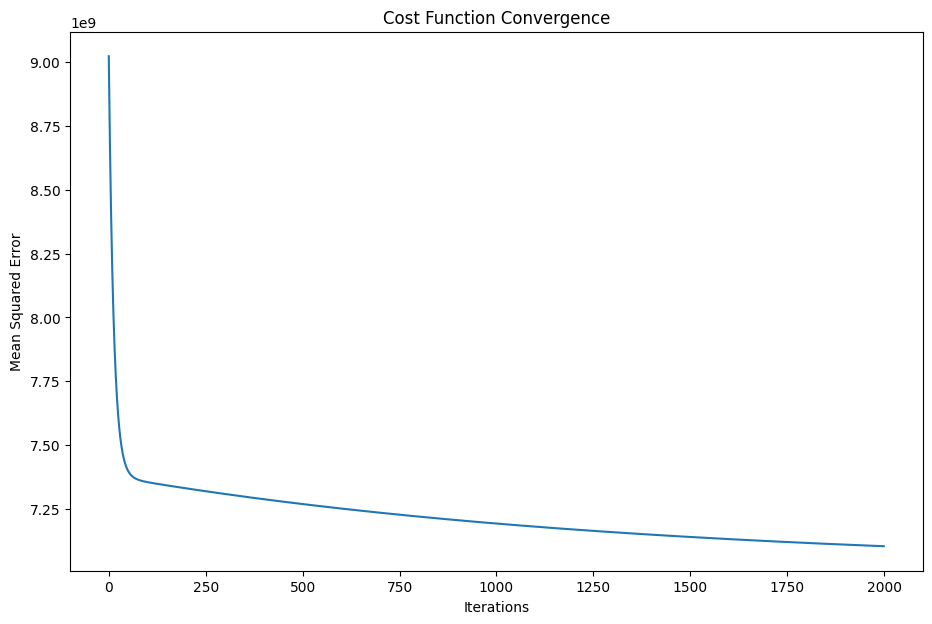

In [121]:
numpy_model = numpy_multivar_lin_reg()
numpy_model.fit(x_train,y_train)

In [122]:
y_pred = model.predict(x_test)
errors = y_pred - y_test
errors

9275     -44015.200140
18656    -76872.964265
3176      75120.554605
20582    105128.537606
17018    -44887.535499
             ...      
8269    -101962.689225
3984      56184.262261
14422   -106262.913350
20251    -38623.624521
7758      29066.609207
Name: median_house_value, Length: 4087, dtype: float64

In [124]:
mae_2 = np.mean(np.abs(errors))
print(f"mean absolute error is {mae_2:.4f}")

rmse_2 = np.sqrt(np.mean(errors**2))
print(f"root mean square error is {rmse_2:.4f}")

ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum(errors**2)
r2_score_2 = 1 - (ss_residual / ss_total)
print(f"R2_score is {r2_score_2:.4f}")

mean absolute error is 62017.9902
root mean square error is 83962.9593
R2_score is 0.8942


# Part 3 :Using Scikit-learn library

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [126]:
model = LinearRegression()

In [144]:
x_train = x_train.values.reshape(-1, 1) 

In [145]:
x_test = x_test.values.reshape(-1, 1) 

In [146]:
start_time = time.time()
model.fit(x_train, y_train)
end_time = time.time()

# Calculate the fitting duration
fitting_duration = end_time - start_time
print(f'Fitting Duration: {fitting_duration:.4f} seconds')

Fitting Duration: 0.0089 seconds


In [147]:
predictions = model.predict(x_test)
predictions

array([303121.86330068, 124187.33142523, 211177.76407465, ...,
        95100.06361605, 274678.52615142, 152138.52157013])

In [148]:
mse_3 = mean_squared_error(y_test, predictions)
mae_3 = mean_absolute_error(y_test, predictions)
rmse_3 = np.sqrt(mse_3)
r2_3 = r2_score(y_test, predictions)

In [149]:
print(f'mean absolute error: {mae_3:.4f}')
print(f'Root Mean Squared Error: {rmse_3:.4f}')
print(f'R-squared Score: {r2_3:.4f}')

mean absolute error: 66667.5970
Root Mean Squared Error: 86526.5733
R-squared Score: 0.4409


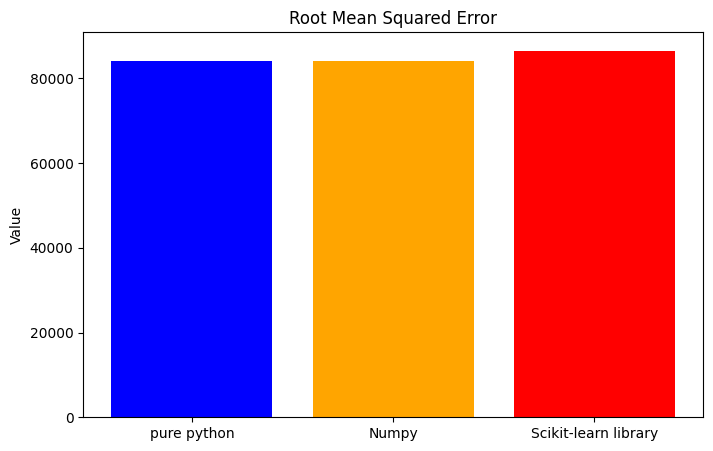

In [150]:
metrics = ['pure python','Numpy','Scikit-learn library']
values = [rmse_1,rmse_2,rmse_3]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'orange','red'])
plt.ylabel('Value')
plt.title('Root Mean Squared Error')
plt.show()

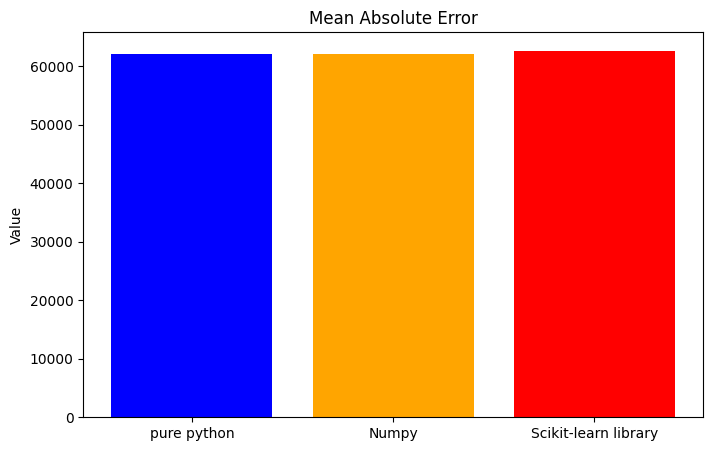

In [135]:
metrics = ['pure python','Numpy','Scikit-learn library']
values = [mae_1,mae_2,mae_3]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'orange','red'])
plt.ylabel('Value')
plt.title('Mean Absolute Error')
plt.show()

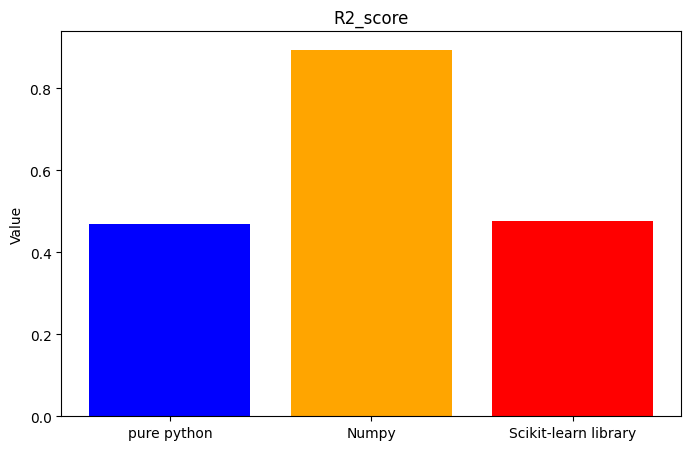

In [138]:
metrics = ['pure python','Numpy','Scikit-learn library']
values = [r2_1,r2_score_2,r2_3]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'orange','red'])
plt.ylabel('Value')
plt.title('R2_score')
plt.show()